In [36]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [37]:
batch_size = 32
epochs = 10
lr = 0.01

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


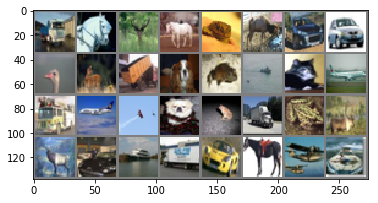

truck horse  deer horse


In [38]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [39]:
# Exploring the data
new_data = next(iter(train_loader))
# so as mentioned before it is in 64 batch increments
new_data[0][0].shape

torch.Size([3, 32, 32])

In [40]:
new_data[0][1]

tensor([[[-0.3176, -0.2157,  0.0745,  ...,  0.5608,  0.3569,  0.4275],
         [-0.3882, -0.2549, -0.3020,  ...,  0.3098,  0.2627,  0.3412],
         [-0.5373, -0.3490, -0.5216,  ...,  0.2706,  0.2784,  0.2863],
         ...,
         [-0.0039, -0.0431, -0.0980,  ...,  0.0118,  0.0275, -0.2078],
         [-0.0118,  0.0275, -0.0353,  ..., -0.1608, -0.0588, -0.2078],
         [ 0.0196, -0.0196, -0.1529,  ..., -0.2863, -0.2392, -0.2314]],

        [[ 0.0745,  0.1294,  0.3176,  ...,  0.5608,  0.4118,  0.4902],
         [-0.0118,  0.1059, -0.0353,  ...,  0.3020,  0.3647,  0.4588],
         [-0.1686,  0.0118, -0.2157,  ...,  0.2471,  0.3961,  0.4353],
         ...,
         [-0.0510, -0.0980,  0.0275,  ...,  0.5608,  0.5529,  0.3176],
         [-0.0118,  0.1137,  0.2706,  ...,  0.4275,  0.5059,  0.3961],
         [ 0.2000,  0.3255,  0.3882,  ...,  0.3333,  0.3804,  0.4667]],

        [[-0.6471, -0.5137, -0.0745,  ...,  0.3020,  0.0039,  0.1686],
         [-0.6627, -0.5137, -0.4745,  ..., -0

Architecture Requirements:

- Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
- 2 by 2 max pooling.
- Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
- 2 by 2 max pooling.
- Flatten to vector.
- Linear layer with 64 hidden units + Tanh nonlinearity.
- Linear layer to 10 output units.

In [41]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16, 128, 5)
        self.maxpool2 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(128*5*5, 64)
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.maxpool1(F.tanh(self.conv1(x)))
        x = self.maxpool2(F.tanh(self.conv2(x)))
        x = x.view(-1, 128*5*5)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [42]:
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [43]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [45]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:
            print('Loss after %d epochs is: %.3f' %
                  (epoch + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')


Loss after 1 epochs is: 1.164
Loss after 2 epochs is: 1.090
Loss after 3 epochs is: 1.021
Loss after 4 epochs is: 0.967
Loss after 5 epochs is: 0.911
Finished Training


In [46]:
# Testing the Model on the training set
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

net = Net()
dataiter = iter(test_loader)
images, labels = dataiter.next()

net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [47]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


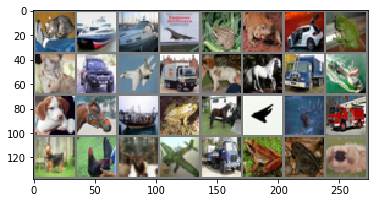

In [48]:
imshow(torchvision.utils.make_grid(images))

In [49]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 65 %


In [50]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 77 %
Accuracy of  bird : 53 %
Accuracy of   cat : 37 %
Accuracy of  deer : 53 %
Accuracy of   dog : 53 %
Accuracy of  frog : 62 %
Accuracy of horse : 79 %
Accuracy of  ship : 76 %
Accuracy of truck : 75 %
